### Importing

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re

### Method : seaborn 시각화로 pie chart 그려보기

In [33]:
def visualize_data(contents, frequency, c):
    colors = sns.color_palette('pastel')[0:5]
    
    # 비율 계산 및 1% 미만인 항목을 합치기
    total = sum(frequency)
    threshold = 0.02  # 1% 임계값 설정
    combined_freq = 0
    combined_label = "기타 항목"
    combined_indices = []

    for i, freq in enumerate(frequency):
        percentage = freq / total
        if percentage < threshold:
            combined_freq += freq
            combined_indices.append(i)

    # 기타 항목을 데이터에서 제거
    frequency = [freq for i, freq in enumerate(frequency) if i not in combined_indices]
    contents = [content for i, content in enumerate(contents) if i not in combined_indices]

    # freq 값 기준으로 내림차순 정렬
    temp = list(zip(contents, frequency))
    temp.sort(key=lambda x: x[1], reverse=True)
    contents, frequency = zip(*temp)
    
    contents = list(contents)
    frequency = list(frequency)
    
    # 기타 항목을 추가
    if combined_freq != 0:
        frequency.append(combined_freq)
        contents.append(combined_label)

    # 한글 깨짐 방지
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    # 파이 차트 그리기
    plt.figure(figsize=(8, 8))
    plt.pie(frequency, labels=contents, autopct='%1.1f%%', startangle=140, colors=colors)
    plt.axis('equal')  # 원형을 유지합니다.

    plt.title(c)
    plt.show()

### Method : 데이터프레임 추출하기

In [34]:
def load_DataFrame(fname, sh_name, origin_col, new_col):
    df = pd.read_excel(fname, sheet_name=sh_name, engine='openpyxl')
    columns_dict = {}
    for org_col, nw_col in zip(origin_col, new_col):
        columns_dict[org_col] = nw_col
    df.rename(columns=columns_dict, inplace=True)
    df = df[new_col]
    return df

### Method : Preprocessing 전처리하기

In [35]:
def preprocessing_dict(df, col):
    pattern = r'\(([^)]*)\)'
    
    for c in col:
        prprc_dict = {}
        contents_obj = df[[c]].dropna()
        
        for idx in range(len(contents_obj)):
            
            input_string = contents_obj.iloc[idx][c]
            data = re.sub(pattern, lambda x: x.group(0).replace(',', ';'), input_string)
            
            data = contents_obj.iloc[idx][c].split(',')
            for content in data:
                content = content.replace(';', ',').strip()
                
                while(len(content) != 0 and content[-1] in ['.', '!']):
                    content = content[:-1]
                
                if content not in prprc_dict:
                    prprc_dict[content] = 1
                else:
                    prprc_dict[content] += 1
    
        contents = []
        frequency = []
        
        for key, value in prprc_dict.items():
            contents.append(key)
            frequency.append(value)

        visualize_data(contents, frequency, c)
        

### Method : Main 실행부

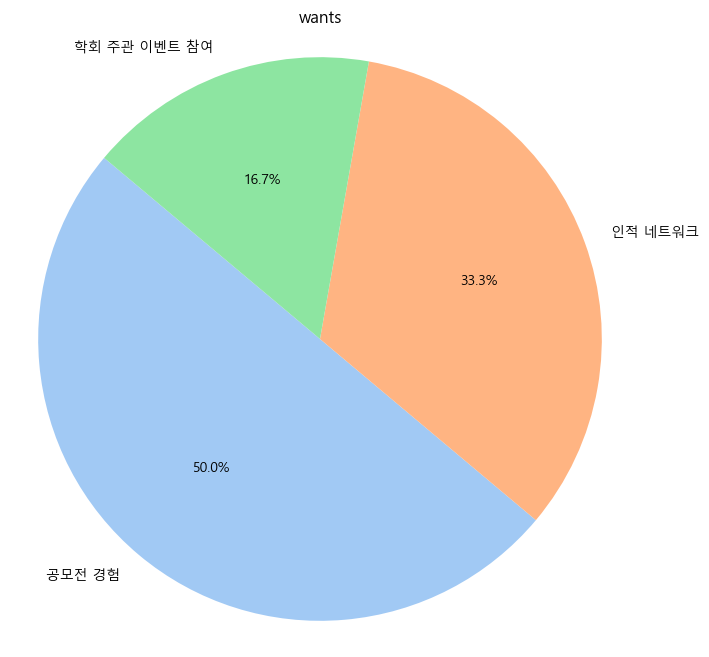

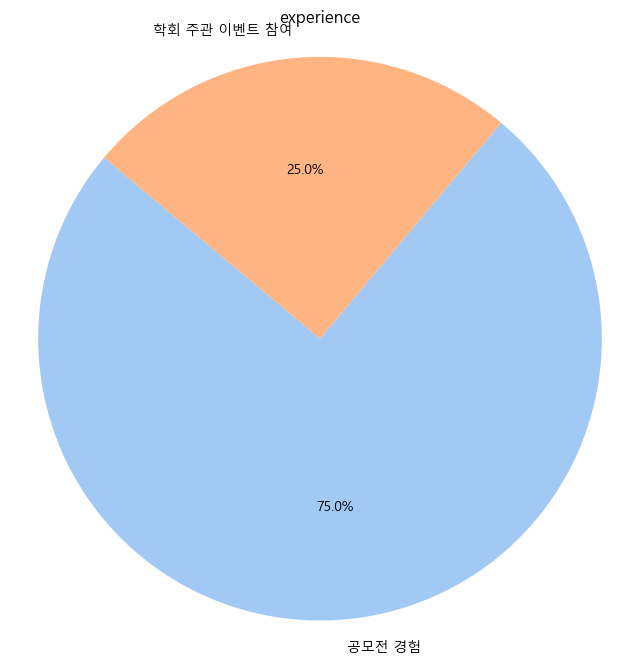

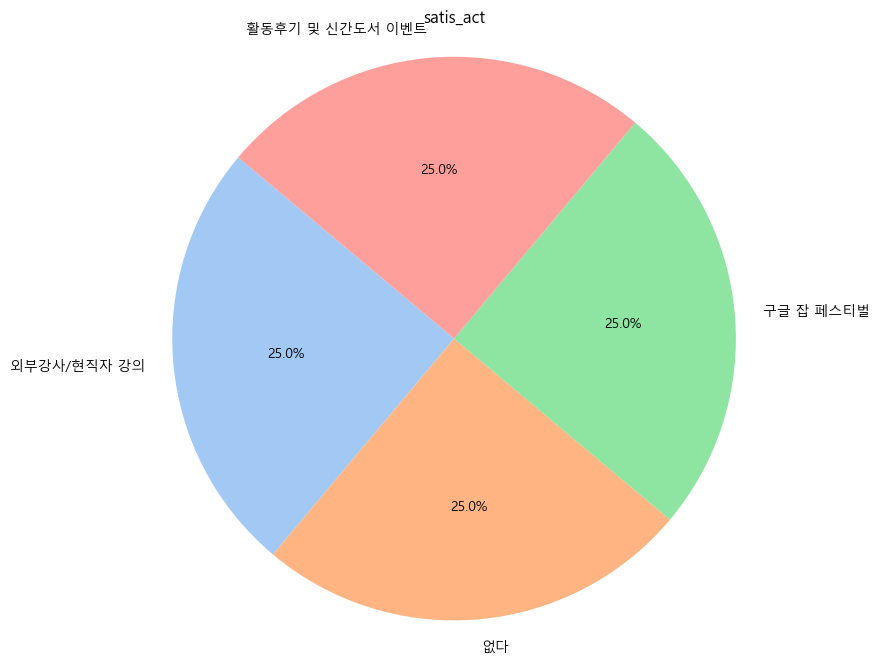

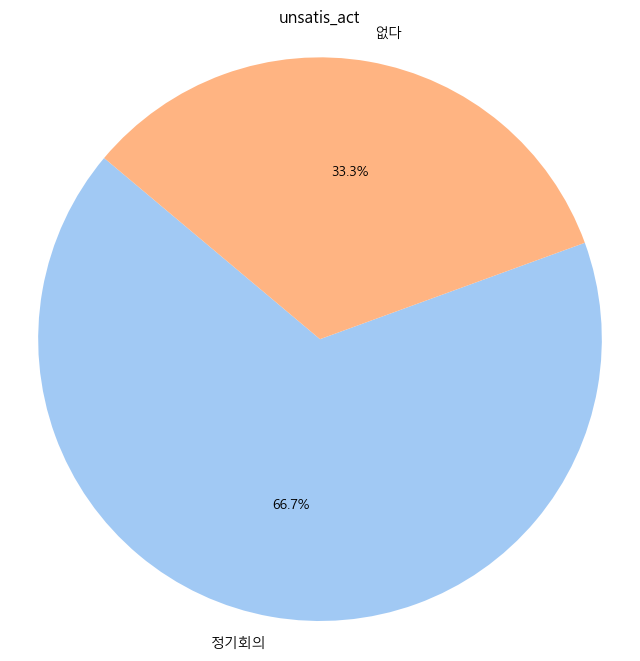

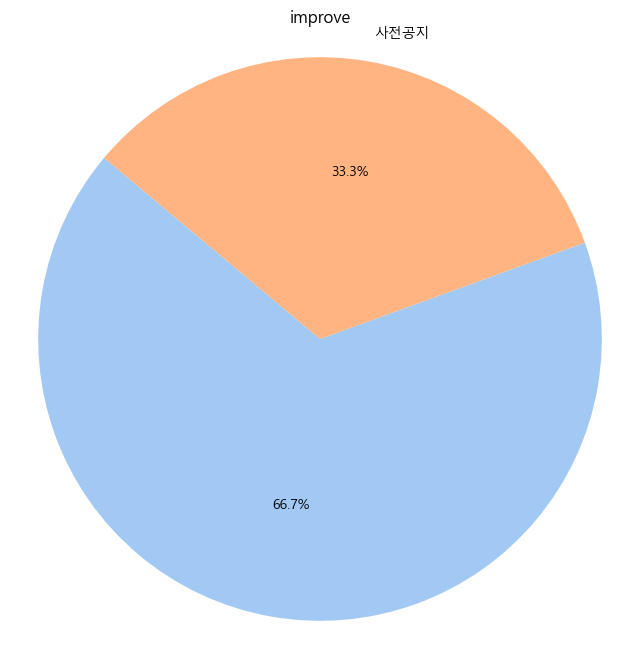

In [43]:
sheet_name = "설문지 응답 시트1"
original_columns = ['학회에 들어오기 전 얻을 것으로 기대했던 것을 골라주세요.', 
                    '학회에 들어와서 실제 경험했던 것을 골라주세요', 
                    'BDA에서 만족스러웠던 활동은 무엇인가요?', 
                    'BDA에서 불만족스러웠던 활동은 무엇인가요?', 
                    '정기회의에 있어 개선되었으면 하는 점이 있으신가요?']
rename_columns = ['wants', 'experience', 'satis_act', 'unsatis_act', 'improve']

dataFrame = load_DataFrame('6기 수료 만족도 조사-고급반(응답).xlsx', sheet_name, original_columns, rename_columns)

preprocessing_dict(dataFrame, rename_columns)